---
title: "Bewakoof Detector"
jupyter: python3

---

In [28]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [31]:
!unset http_proxy
!unset https_proxy

In [32]:
from fastai.vision.all import *

In [33]:
PATH = Path("data/suchith_or_shivani/")

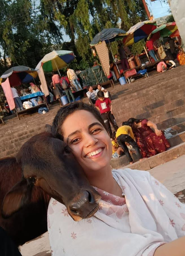

In [34]:
path = 'data/shivani.jpg'
Image.open(path).to_thumb(256, 256)

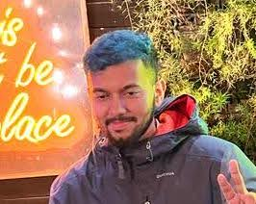

In [79]:
#| true: false

path = 'data/suchith.jpg'
Image.open(path).to_thumb(256, 256)

### Cleaning dataset

In [85]:
from ipywidgets import widgets
from IPython.display import display

In [88]:
#| code-fold: true

files = get_image_files(PATH)

button_next = widgets.Button(description="Next")
button_pre = widgets.Button(description="Previous")
button_rotate_left = widgets.Button(description="Rotate left", icon="rotate-left")
button_rotate_right = widgets.Button(description="Rotate right", icon="rotate-right")

output = widgets.Output()

COUNTER = -1
IMAGE = None
MODIFIED = False

def button_next_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    if MODIFIED:
        IMAGE.save(files[COUNTER])
        MODIFIED = False

    COUNTER += 1
    output.clear_output()
    
    if COUNTER < len(files):
        IMAGE = Image.open(files[COUNTER])
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Buffer overflow.")
            
def button_rotate_left_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    output.clear_output()
    
    if COUNTER > -1 and COUNTER < len(files):
        MODIFIED = True
        IMAGE = IMAGE.rotate(90)
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Invalid counter value.")
                   
def button_rotate_right_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    output.clear_output()
    
    if COUNTER > -1 and COUNTER < len(files):
        MODIFIED = True
        IMAGE = IMAGE.rotate(-90)
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Invalid counter value.")
                     
def button_previous_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    if MODIFIED:
        IMAGE.save(files[COUNTER])
        MODIFIED = False
    
    COUNTER -= 1
    output.clear_output()
    
    if COUNTER > -1:
        IMAGE = Image.open(files[COUNTER])
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Buffer underflow.")
            
button_rotate_left.on_click(button_rotate_left_eventhandler)
button_rotate_right.on_click(button_rotate_right_eventhandler)
button_next.on_click(button_next_eventhandler)
button_pre.on_click(button_previous_eventhandler)
            

item_layout = widgets.Layout(margin="0 0 50px 0")

buttons = widgets.HBox([button_rotate_left, button_rotate_right, button_next, button_pre], layout=item_layout)

tab = widgets.Tab([output])
tab.set_title(0, 'Image')

dashboard = widgets.VBox([buttons, tab], layout=item_layout)

In [89]:
display(dashboard)

### Datablock

In [90]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(224, method='squish')],
    batch_tfms=aug_transforms()
).dataloaders(PATH)

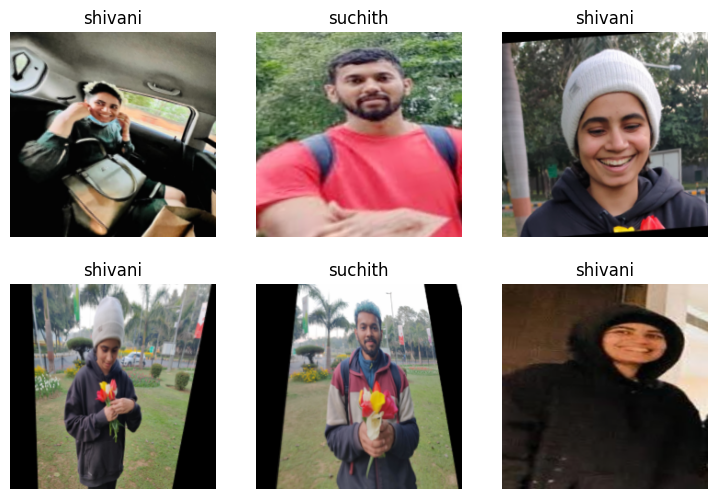

In [91]:
dls.show_batch(max_n=6)

### Model

In [92]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.256843,0.918047,0.416667,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.876068,0.843697,0.444444,00:06
1,0.823288,0.790361,0.388889,00:05
2,0.749693,0.638904,0.305556,00:05
3,0.623945,0.448487,0.194444,00:05
4,0.526806,0.328966,0.083333,00:05
5,0.456535,0.236890,0.027778,00:05
6,0.388769,0.198798,0.027778,00:05
7,0.349373,0.187475,0.027778,00:05
8,0.307049,0.179472,0.027778,00:06
9,0.280856,0.182338,0.027778,00:05


In [95]:
is_suchith, _, probs = learner.predict(PILImage.create("data/shivani.jpg"))
print(f"This is : {is_suchith}")
print(f"The probability it is suchith : {probs}")

This is : shivani
The probability it is suchith : tensor([0.9983, 0.0017])


In [97]:
learner.export("models/suchith_or_shivani.pth")